In [48]:
from __future__ import division
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#from analytics_tools.analytics_tools3 import freq_discrete
%matplotlib inline

In [4]:
df = pd.read_excel('Data/clasificador_sexo.xlsx')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
estatura    24 non-null int64
zapato      24 non-null int64
sexo        24 non-null object
dtypes: int64(2), object(1)
memory usage: 648.0+ bytes


In [5]:
df.head()

,estatura,zapato,sexo
0,185,28,H
1,168,26,H
2,175,27,H
3,174,26,H
4,170,26,H


In [6]:
df.sexo.value_counts()

H    17
M     7
Name: sexo, dtype: int64

In [18]:
for i in range(1000):
    if i == 0:
        bs = df.sample(n=5)
    else:
        bs = pd.concat([bs,df.sample(n=5)],ignore_index=True)

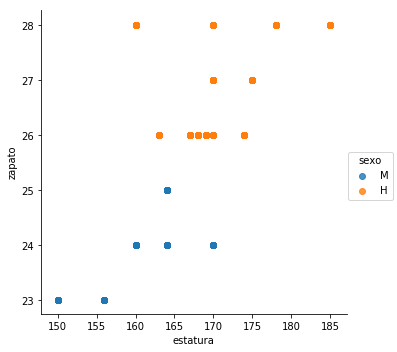

In [25]:
sns.lmplot(data=bs,x='estatura',y='zapato',hue='sexo',fit_reg=False)

In [26]:
X = bs[['estatura','zapato']].copy()
y = (bs['sexo']=='M').astype(int)

In [27]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(Xt,yt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [53]:
def metricas(model,Xt,Xv,yt,yv):
    print "Accuracy_Train %.2f, Accuracy_Validate %.2f "%(accuracy_score(y_pred=model.predict(Xt),y_true=yt),accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print "ROC_Train %.2f, ROC_Validate %.2f "%(roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt),roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))


In [46]:
param_grid = dict({'criterion':['gini','entropy'],
              'max_features': [1,2],
              'max_depth':[1,2,3],  
              'min_samples_split' = range(10,100)
             })

In [49]:
grid = GridSearchCV(param_grid=param_grid,
                    n_jobs=-1,
                    estimator=model,
                    scoring='accuracy',
                    cv=3)

In [51]:
%%time
grid.fit(X,y)

CPU times: user 118 ms, sys: 30.9 ms, total: 148 ms
Wall time: 199 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [1, 2], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [55]:
metricas(grid.best_estimator_,Xt,Xv,yt,yv)

Accuracy_Train 0.96, Accuracy_Validate 0.97 
ROC_Train 1.00, ROC_Validate 1.00 
